# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["ClaSS", "FLOSS", "BOCD", "Window"]
dataset = "TSSB"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,ClaSS,FLOSS,BOCD,Window
0,Adiac,0.706,0.445,0.433,0.303
1,ArrowHead,0.985,0.500,0.500,0.500
2,Beef,0.939,0.500,0.500,0.500
3,BeetleFly,0.682,0.500,0.476,0.500
4,BirdChicken,0.977,0.500,0.500,0.500
5,Car,0.889,0.256,0.543,0.256
6,CBF,0.969,0.949,0.503,0.342
7,ChlorineConcentration,0.577,0.577,0.589,0.577
8,CinCECGTorso,0.337,0.337,0.337,0.583
9,Coffee,0.996,0.500,0.506,0.500


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2794/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ClaSS     0.807
FLOSS     0.484
BOCD      0.464
Window    0.485
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2794/1729043111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ClaSS     0.887
FLOSS     0.500
BOCD      0.448
Window    0.473
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2794/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ClaSS     0.194
FLOSS     0.227
BOCD      0.207
Window    0.224
dtype: float64

Let's compute the wins per method.

In [9]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [10]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSS:wins=63 rank=1.21333
FLOSS:wins=10 rank=2.42667
BOCD:wins=10 rank=2.62667
Window:wins=13 rank=2.26667


Let's plot and output the ranks.

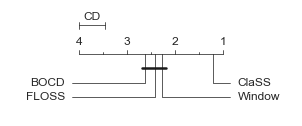

In [11]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, filename=f"../../figures/cd_comparative_{dataset}.pdf") # 

Let's compute wins/losses against ClaSP.

In [12]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 56/17/2
ClaSS vs BOCD: (wins/ties/losses): 60/7/8
ClaSS vs Window: (wins/ties/losses): 57/12/6


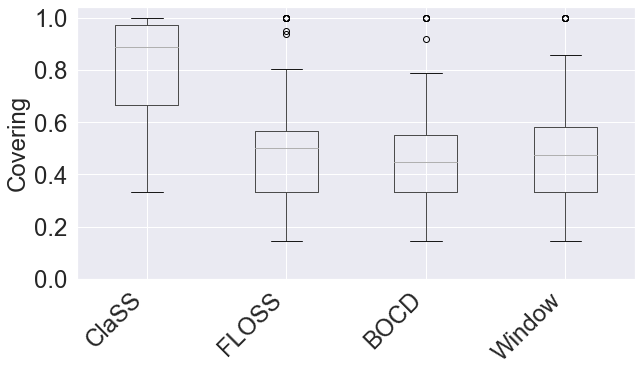

In [13]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight") 